Import Library


In [514]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [515]:
diabetes_df = pd.read_csv('diabetes_data_upload.csv')
diabetes_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [516]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Preprocessing

In [517]:
{
    column: len(diabetes_df[column].unique())
    for column in diabetes_df.columns
}

{'Age': 51,
 'Gender': 2,
 'Polyuria': 2,
 'Polydipsia': 2,
 'sudden weight loss': 2,
 'weakness': 2,
 'Polyphagia': 2,
 'Genital thrush': 2,
 'visual blurring': 2,
 'Itching': 2,
 'Irritability': 2,
 'delayed healing': 2,
 'partial paresis': 2,
 'muscle stiffness': 2,
 'Alopecia': 2,
 'Obesity': 2,
 'class': 2}

## Mapping text into values

In [518]:
diabetes_df['Gender'] = diabetes_df['Gender'].replace({'Male': 0, 'Female': 1})
diabetes_df['class'] = diabetes_df['class'].replace({'Negative': 0, 'Positive': 1})

for col in diabetes_df.columns:
    if col not in ['Age', 'Gender', 'class']:
        diabetes_df[col] = diabetes_df[col].replace({'Yes': 1, 'No': 0})

In [519]:
# groupping age by values
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
diabetes_df['Age Group'] = pd.cut(diabetes_df['Age'], bins=bins, labels=labels)

In [520]:
diabetes_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age Group
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,20-40
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,40-60
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,40-60
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,40-60
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,40-60


## EDA
Analysing the correlation between independent and dependent variables. Considering variables has high correlation with the dependent variable and low correlation with the independent variables.

In [521]:
corr_data = diabetes_df.corr()

<AxesSubplot:>

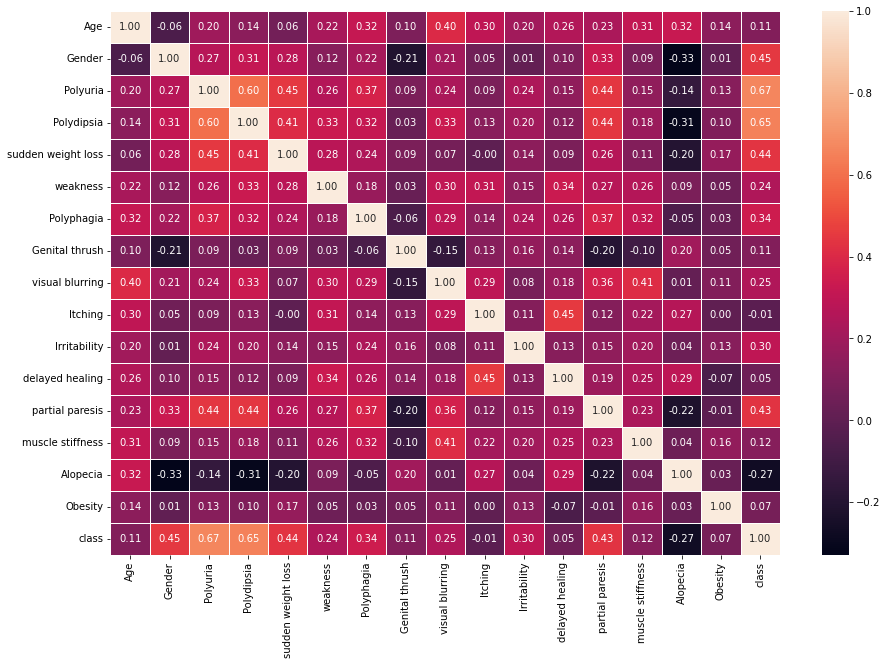

In [522]:
ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_data, annot=True, linewidths=.5, fmt='.2f')

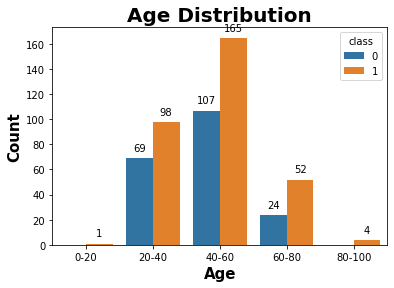

In [523]:
ax = sns.countplot(x='Age Group', hue='class', data=diabetes_df)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Age Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.show()

Age/class (dependent variable)

<AxesSubplot:xlabel='class', ylabel='Age'>

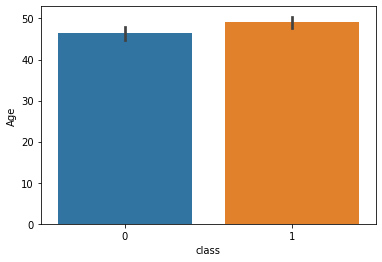

In [524]:
sns.barplot(x='class', y='Age', data=diabetes_df)

<AxesSubplot:xlabel='class', ylabel='count'>

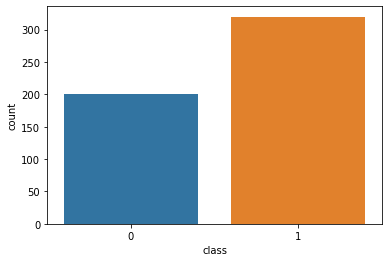

In [525]:
sns.countplot(x='class', data=diabetes_df)

Gender

<AxesSubplot:xlabel='class', ylabel='count'>

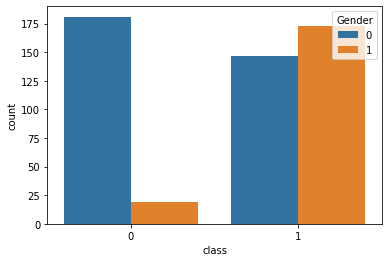

In [526]:
sns.countplot(x='class', data=diabetes_df, hue='Gender')

Polyuria

<AxesSubplot:xlabel='Polyuria', ylabel='class'>

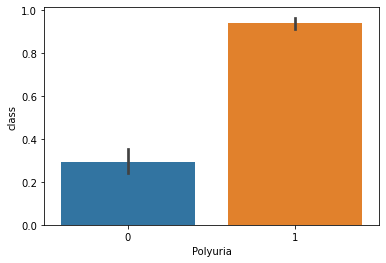

In [527]:
sns.barplot(x='Polyuria', y='class', data=diabetes_df)

Polydipsia

<AxesSubplot:xlabel='Polydipsia', ylabel='class'>

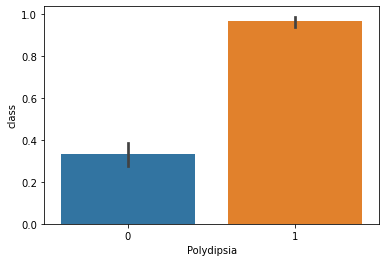

In [528]:
sns.barplot(x='Polydipsia', y='class', data=diabetes_df)

Sudden Weight Loss

<AxesSubplot:xlabel='class', ylabel='count'>

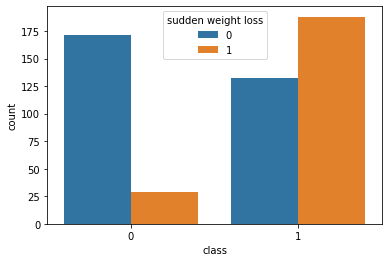

In [529]:
sns.countplot(x='class', data=diabetes_df, hue='sudden weight loss')

Polyphagia

<AxesSubplot:xlabel='Polyphagia', ylabel='class'>

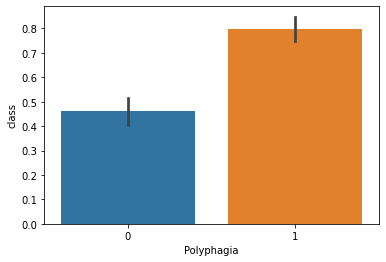

In [530]:
sns.barplot(x='Polyphagia', y='class', data=diabetes_df)

Genital Thrush

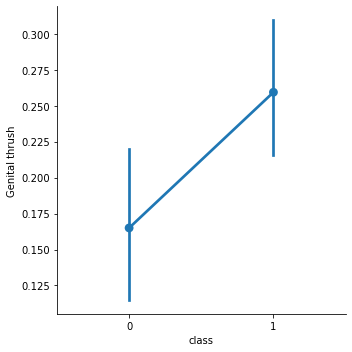

In [531]:
sns.catplot(x='class', y='Genital thrush', data=diabetes_df, kind='point')

Partial Paresis

<AxesSubplot:xlabel='class', ylabel='partial paresis'>

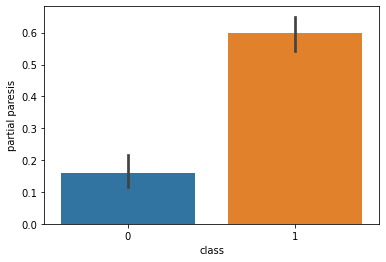

In [532]:
sns.barplot(x='class', y='partial paresis', data=diabetes_df)

Alopecia

<AxesSubplot:xlabel='Alopecia', ylabel='class'>

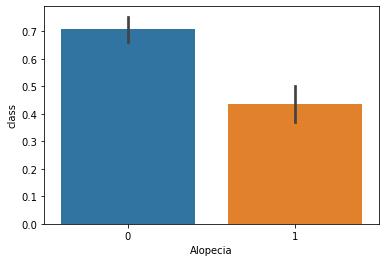

In [533]:
sns.barplot(x='Alopecia', y='class', data=diabetes_df)

Visual Blurring

<AxesSubplot:xlabel='visual blurring', ylabel='class'>

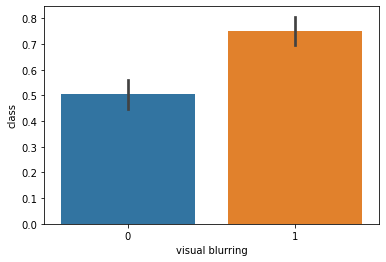

In [534]:
sns.barplot(x='visual blurring', y='class', data=diabetes_df)

Itching

<AxesSubplot:xlabel='Itching', ylabel='class'>

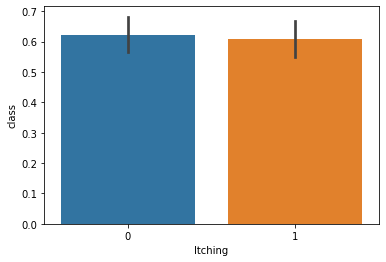

In [535]:
sns.barplot(x='Itching', y='class', data=diabetes_df)

<AxesSubplot:xlabel='Obesity', ylabel='class'>

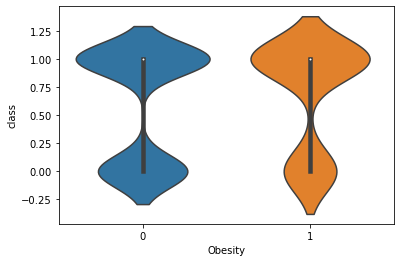

In [536]:
sns.violinplot(x='Obesity', y='class', data=diabetes_df)

Irriability

<AxesSubplot:xlabel='Irritability', ylabel='class'>

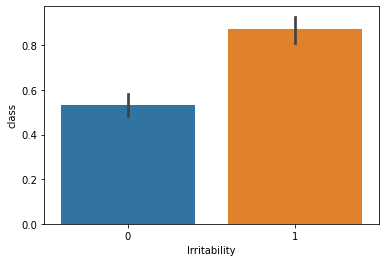

In [537]:
sns.barplot(x='Irritability', y='class', data=diabetes_df)

Obesity

## KNN Classifier

In [538]:
x = diabetes_df.drop(['class', 'Age Group'], axis=1)
y = diabetes_df['class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [539]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [540]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [541]:
y_pred = knn_model.predict(scaled_X_test)

In [542]:
test_error_rates = {}

for i in range(1, 31):
    knn_modell = KNeighborsClassifier(n_neighbors=i)
    knn_modell.fit(scaled_X_train, y_train)
    y_pred = knn_modell.predict(scaled_X_test)
    test_error_rates[i] = 1 - accuracy_score(y_test, y_pred)

In [543]:
best_k = {'k': 0, 'error_rate': 1}
for key, value in test_error_rates.items():
    # print(f'k={key}, error rate={value}')
    if value < best_k['error_rate']:
        best_k['k'] = key
        best_k['error_rate'] = value

print(f'Best k={best_k["k"]}, error rate={best_k["error_rate"]}')


Best k=1, error rate=0.02564102564102566


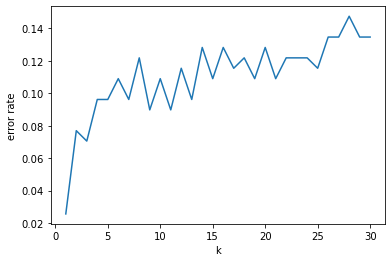

In [544]:
plt.plot(list(test_error_rates.keys()), list(test_error_rates.values()))
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()

In [545]:
confusion_matrix(y_test, y_pred)

array([[52,  2],
       [19, 83]])

In [546]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        54
           1       0.98      0.81      0.89       102

    accuracy                           0.87       156
   macro avg       0.85      0.89      0.86       156
weighted avg       0.89      0.87      0.87       156



In [547]:
samples = [
    [40,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
    [37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
]

knn_model.predict(samples)



array([1, 0])